In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

def unpickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data

In [36]:
date = '20140111'
file_label = f'/home/dsola/repos/PGA-Net/data/patch20/{date}_patch20_stride3_erie.pkl'
file_lat = f'/home/dsola/repos/PGA-Net/data/patch20/{date}_3_20_lats_used_erie.npy'
file_lon = f'/home/dsola/repos/PGA-Net/data/patch20/{date}_3_20_lons_used_erie.npy'

In [37]:
ice_cons = unpickle(file_label)[0]
lons = np.load(file_lon)
lats = np.load(file_lat)

In [38]:
df = pd.DataFrame({'lat': lats, 'lon': lons, 'val': ice_cons})

In [39]:
df['val'] = df['val'].round(decimals=2)

In [40]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)  

In [41]:
lakes = gpd.read_file('/home/dsola/repos/PGA-Net/data/shapefiles/hydro_p_LakeErie.shp')

<AxesSubplot:>

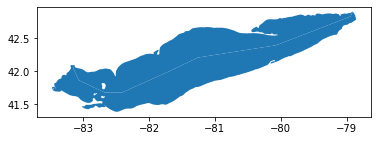

In [42]:
lakes.plot()

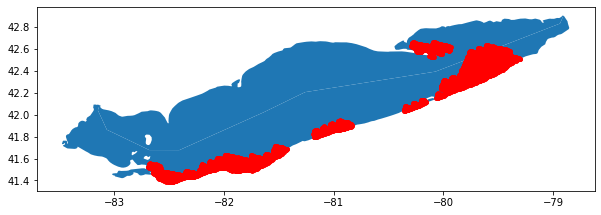

In [43]:
gdf[gdf['val']==0].plot(ax=lakes.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

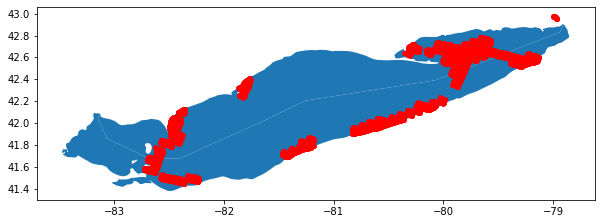

In [44]:
gdf[gdf['val']==0.3].plot(ax=lakes.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

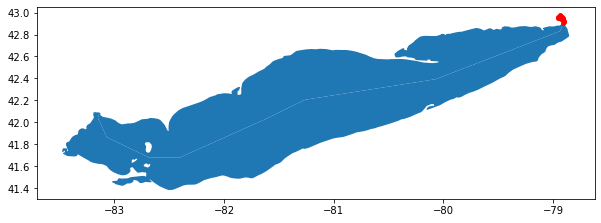

In [45]:
gdf[gdf['val']==0.7].plot(ax=lakes.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

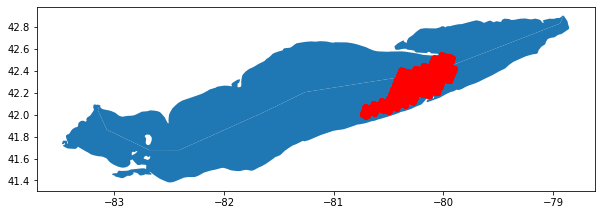

In [46]:
gdf[gdf['val']==0.8].plot(ax=lakes.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

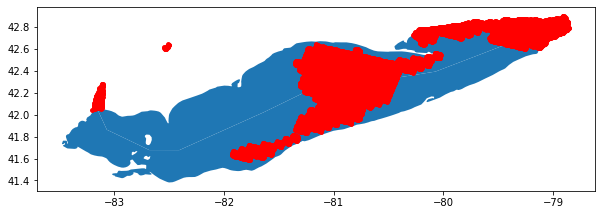

In [47]:
gdf[gdf['val']==0.9].plot(ax=lakes.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

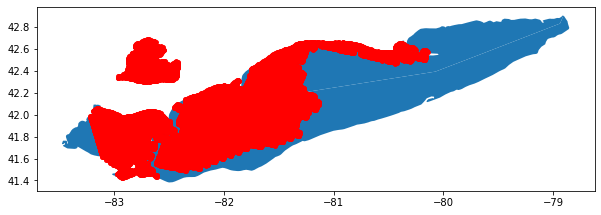

In [48]:
gdf[gdf['val']==1].plot(ax=lakes.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [49]:
np.unique(gdf['val'])

array([0. , 0.3, 0.7, 0.8, 0.9, 1. ])

<AxesSubplot:xlabel='lon', ylabel='lat'>

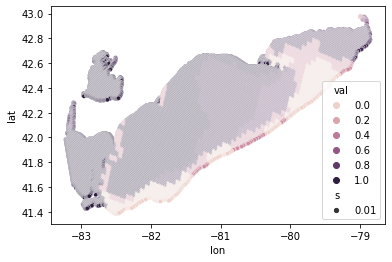

In [22]:
sns.scatterplot(x='lon', y='lat', hue='val', data=df, size='s')

In [32]:
(gdf['val']==1.0).sum()

33740

In [52]:
(gdf['val']==0.0).sum()

7351

In [51]:
(gdf['val']<0.31).sum()

14259

In [35]:
gdf.shape

(72027, 4)

In [ ]:
fig, ax = plt.subplots()
for val, lat, lon in zip(ice_cons, lats, lons):
    ax.scatter(lat, lon, )

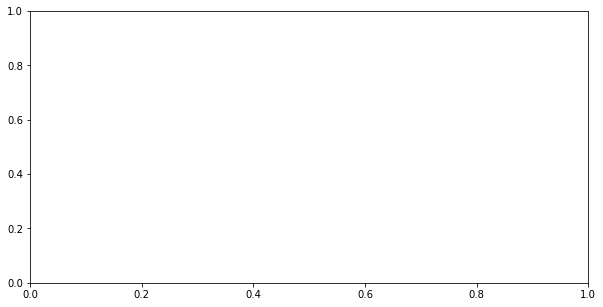

In [40]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10,5))
rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

In [ ]:
for i in